In [1]:
% matplotlib notebook

In [2]:
from diffractio import scalar_masks_XY
from diffractio import um, mm, degrees, plt
from docs.source.TFG_rapariz.codigo.lab_slm import *
from diffractio.scalar_masks_XY import Scalar_mask_XY
import cv2
import numpy as np

s = 1.

SLM = lab_SLM(inicio = False, veloc = 20 * mm/s) # Encendemos nuestro sistemas
mascara = Scalar_mask_XY(SLM.x0, SLM.y0, SLM.wavelength) # Definimos una máscara que enviar al SLM

ImportError: No module named TFG_rapariz.codigo.lab_slm

## <div style = "text-align:justify"> En el siguiente código enviamos una lente al modulador y la enviamos en fase. Una vez enviada al modulador, tomamos una foto y la guarda en el archivo $lente_{-}fase.jpg$ </div>

In [ ]:
mascara.lens(r0 = (0 * um, 0 * um), 
             radius = (2 * mm, 2 * mm), 
             focal = (300 * mm, 300 * mm), 
             angle = 0 * degrees)

SLM.mask_to_rawImage(mask_XY = mascara, kind = 'phase', normalize = True);
SLM.send_image_screen(id_screen = 1, verbose = False)

SLM.vel_motor(vel = 20 * mm/s, kind = 'set')
SLM.move_motor(z = 116 * mm, kind = 'abs')
SLM.get_background()

raw_input('Coloque el polarizador en fase y pulse enter.')
imagen = SLM.acquire_image(draw=False, 
                           filename = 'lente_fase.jpg', 
                           remove_background=False, 
                           is_closed = True)

## <center> En el siguiente código se tomarán 50 imágenes de la lente para distintos valores en $z \in [-125 , 125]mm$ y las guardará en la carpeta $resultados_{-}lente$ <center>

In [ ]:
directorio = 'C:/Users/luismiguel/bitbucket/py_slm/docs/source/TFG_rapariz/resultados_lente'
createFolder(directorio) # Creamos una carpeta donde guardaremos las imágenes del código
os.chdir(directorio) # Nos movemos al nuevo directorio

stops = np.linspace(-125 * mm, 125 * mm, 50)
SLM.vel_motor(vel = 20 * mm/s, kind = 'set')
SLM.move_motor(kind = 'home')

for i, stop in enumerate(stops):
    SLM.move_motor(stop)
    SLM.acquire_image(draw = False, 
                      filename = 'lente_fase_z_'+str(round(stop/mm)) +'.jpg', 
                      remove_background = False, 
                      is_closed = True)

os.chdir('C:/Users/luismiguel/bitbucket/py_slm/docs/source/TFG_rapariz')

## <center> Ahora enviaremos una máscara de lente de Fresnel y tomaremos una foto que se guardará como $lente_{-}fresnel.jpg$ <center>

In [ ]:
t2 = mascara.fresnel_lens(r0=(0 * um, 0 * um), 
                            radius=(2.5 * mm, 2.5 * mm),
                            focal=(1000 * mm, 1000 * mm), 
                            angle=0 * degrees, 
                            mask=True,
                            kind='phase',
                            phase=np.pi)
# mascara.draw(kind = 'field')

In [ ]:
SLM.mask_to_rawImage(mask_XY = mascara, kind = 'phase', normalize = True);
SLM.send_image_screen(id_screen = 1)

In [ ]:
SLM.vel_motor(vel = 20 * mm/s, kind = 'set')
SLM.move_motor(116 * mm)
SLM.get_background()

raw_input('Coloque el polarizador en fase y pulse enter.')
SLM.acquire_image(draw = False, 
                  filename = 'lente_fresnel_1.jpg', 
                  remove_background = True, 
                  is_closed = True);

## <center> En el siguiente código se tomarán 50 imágenes de la lente de fresnel para distintos valores en $z \in [-125 , 125]mm$ y las guardará en la carpeta $resultados_{-}fresnel$ <center>

In [ ]:
directorio = 'C:/Users/luismiguel/bitbucket/py_slm/docs/source/TFG_rapariz/resultados_fresnel'
createFolder(directorio) # Creamos una carpeta donde guardaremos las imágenes del código
os.chdir(directorio) # Nos movemos al nuevo directorio

stops = np.linspace(-125 * mm, 125 * mm, 50)
SLM.vel_motor(vel = 20 * mm/s, kind = 'set')

for i, stop in enumerate(stops):
    SLM.move_motor(stop)
    SLM.acquire_image(draw = False, 
                      filename = 'fresnel_fase_z_'+str(round(stop/mm)) +'.jpg', 
                      remove_background = False, 
                      is_closed = True)

os.chdir('C:/Users/luismiguel/bitbucket/py_slm/docs/source/TFG_rapariz')

## <center> A continuación se enviará una máscara del axicon y se guardará una imagen de esta en el fichero $axicon.jpg$ <center>

In [ ]:
mascara.axicon(r0=(0 * um, 0 * um), radius=10 * mm, height=50 * um,  n=1.5)

SLM.mask_to_rawImage(mask_XY = mascara, kind = 'phase', normalize = True)
SLM.send_image_screen(id_screen = 1)

In [ ]:
SLM.vel_motor(vel = 20 * mm/s, kind = 'set')
SLM.move_motor(116 * mm)
SLM.get_background()

raw_input('Coloque el polarizador en fase y pulse enter.')
SLM.acquire_image(draw = False, 
                  filename = 'axicon.jpg', 
                  remove_background = False, 
                  is_closed = True);

## <center> En el siguiente código se tomarán 50 imágenes del axicon para distintos valores en $z \in [-125 , 125]mm$ y las guardará en la carpeta $resultados_{-}axicon$ <center>

velocidad = 20.00 mm/s
distance = -0.0000 mm
distance = -125.0000 mm


<IPython.core.display.Javascript object>


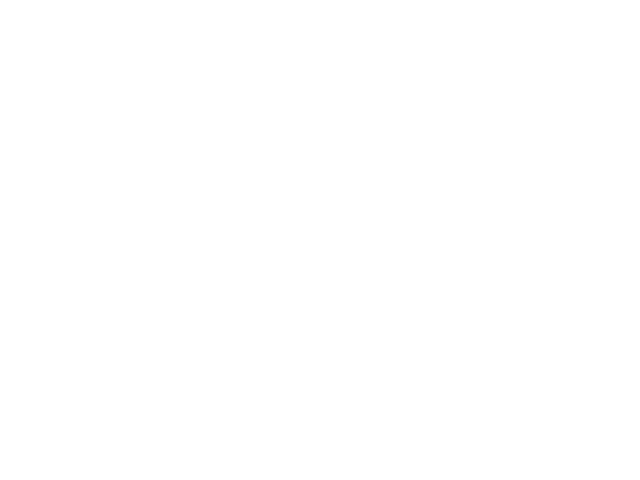

max=255. min=12
shape = (768L, 1024L, 3L)
distance = -119.8980 mm


<IPython.core.display.Javascript object>


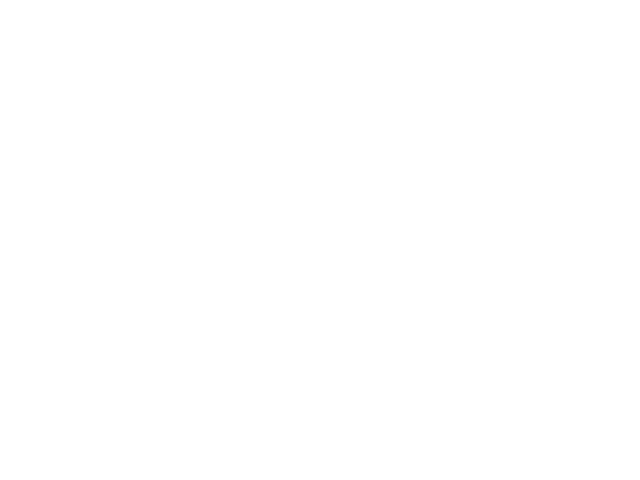

max=255. min=13
shape = (768L, 1024L, 3L)
distance = -114.7959 mm


<IPython.core.display.Javascript object>


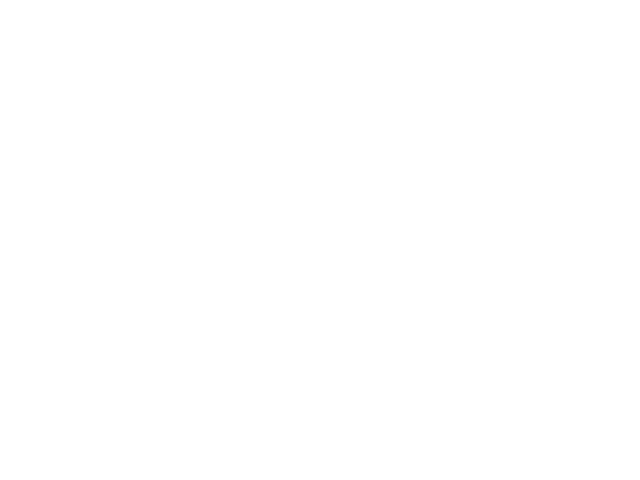

max=255. min=13
shape = (768L, 1024L, 3L)
distance = -109.6938 mm


<IPython.core.display.Javascript object>


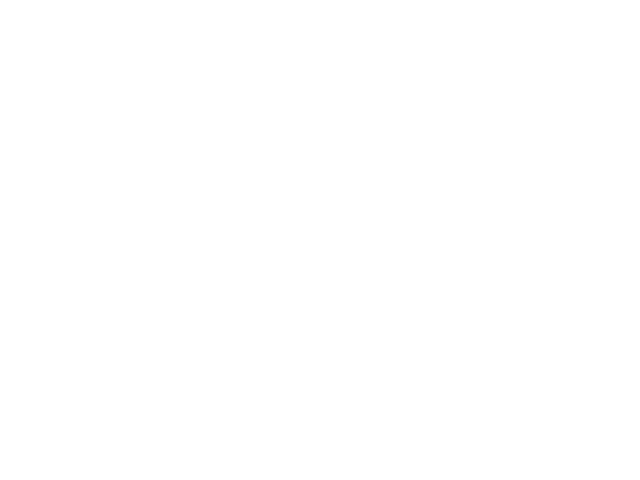

max=255. min=12
shape = (768L, 1024L, 3L)
distance = -104.5918 mm


<IPython.core.display.Javascript object>


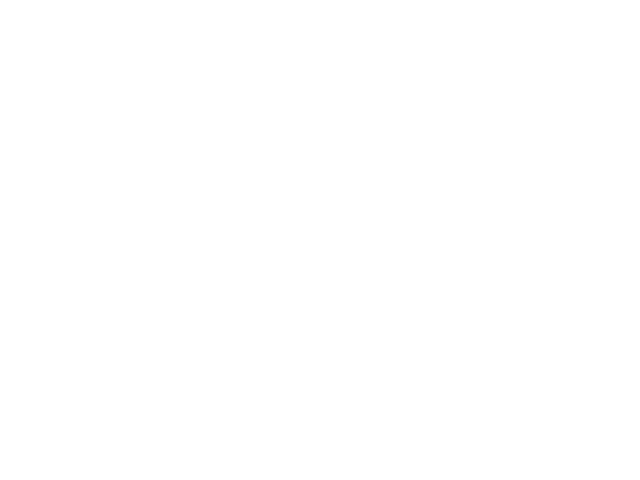

max=255. min=13
shape = (768L, 1024L, 3L)
distance = -99.4898 mm


<IPython.core.display.Javascript object>


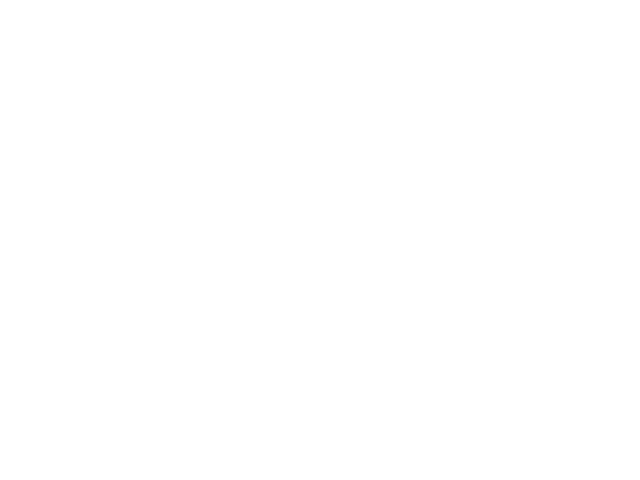

max=255. min=14
shape = (768L, 1024L, 3L)
distance = -94.3878 mm


<IPython.core.display.Javascript object>


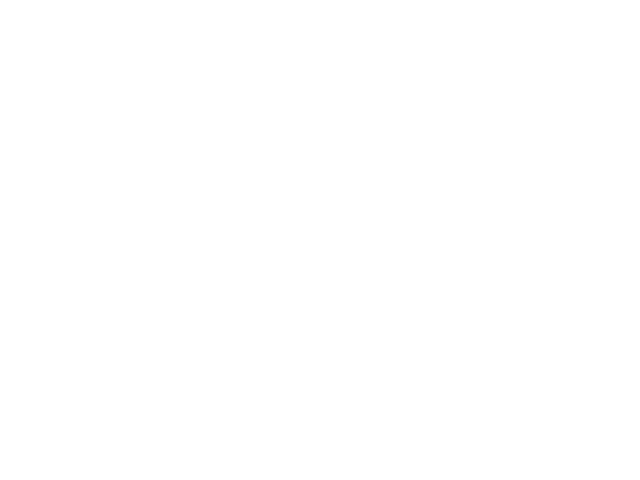

max=255. min=13
shape = (768L, 1024L, 3L)
distance = -89.2857 mm


<IPython.core.display.Javascript object>


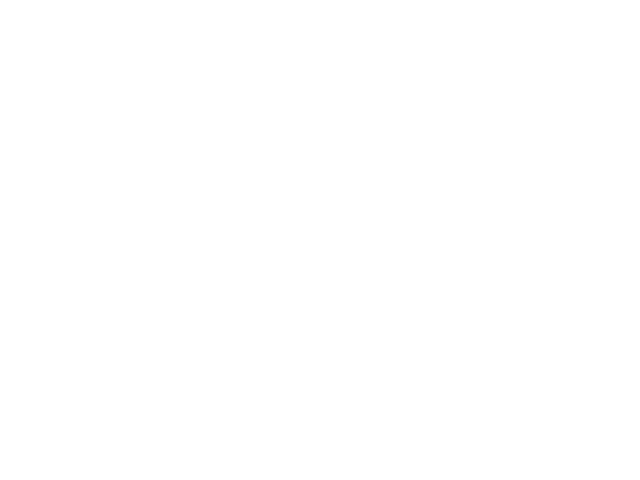

max=255. min=13
shape = (768L, 1024L, 3L)
distance = -84.1836 mm


<IPython.core.display.Javascript object>


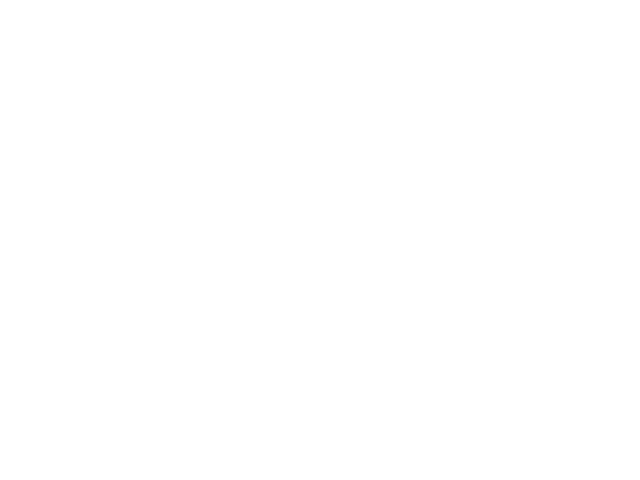

max=255. min=13
shape = (768L, 1024L, 3L)
distance = -79.0816 mm


<IPython.core.display.Javascript object>


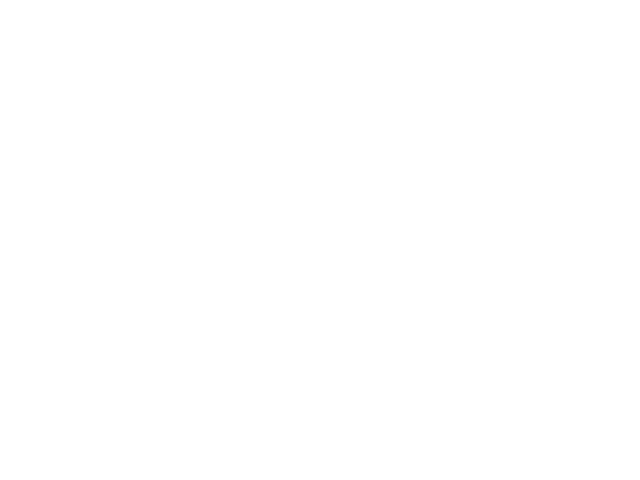

max=255. min=13
shape = (768L, 1024L, 3L)
distance = -73.9796 mm


<IPython.core.display.Javascript object>


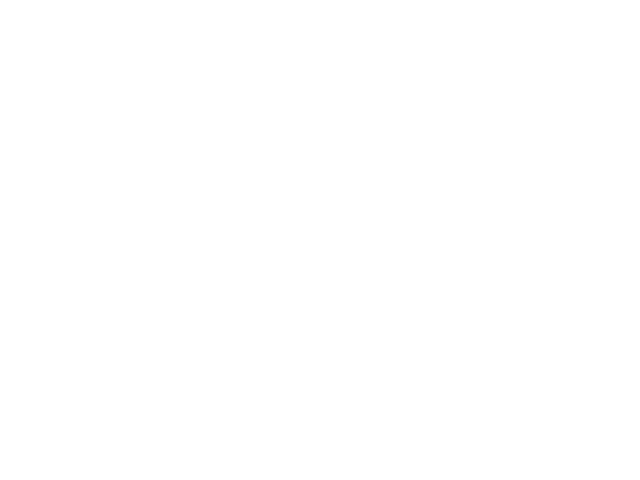

max=255. min=13
shape = (768L, 1024L, 3L)
distance = -68.8775 mm


<IPython.core.display.Javascript object>


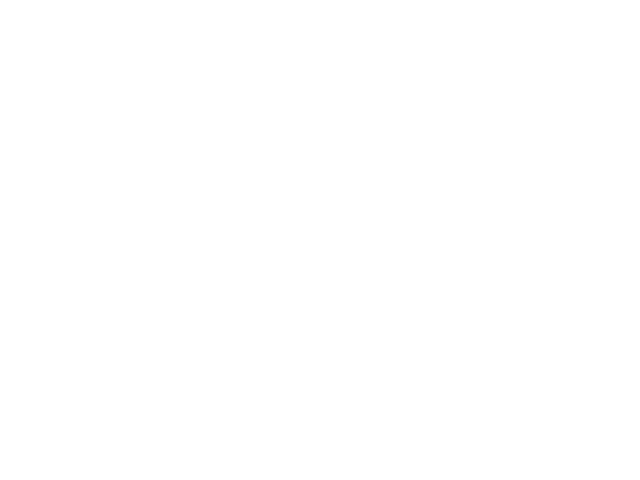

max=255. min=13
shape = (768L, 1024L, 3L)
distance = -63.7755 mm


<IPython.core.display.Javascript object>


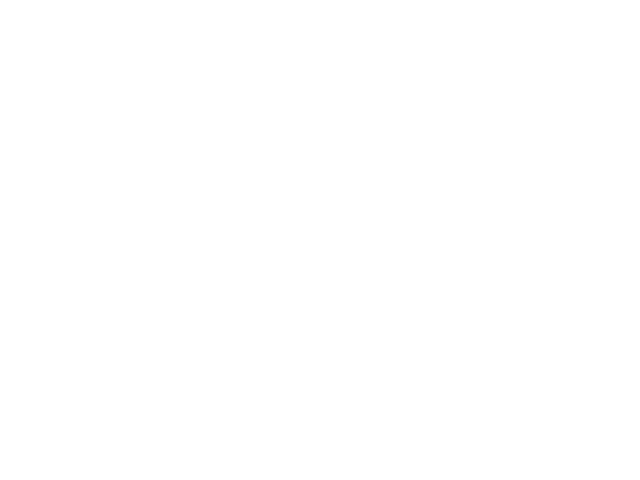

max=255. min=13
shape = (768L, 1024L, 3L)
distance = -58.6734 mm


<IPython.core.display.Javascript object>


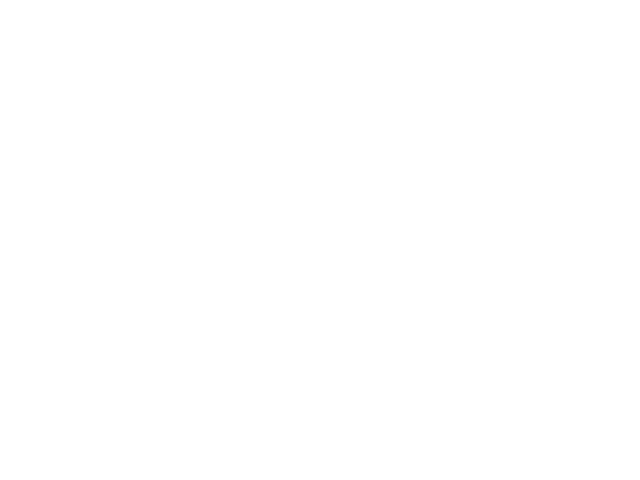

max=255. min=13
shape = (768L, 1024L, 3L)
distance = -53.5714 mm


<IPython.core.display.Javascript object>


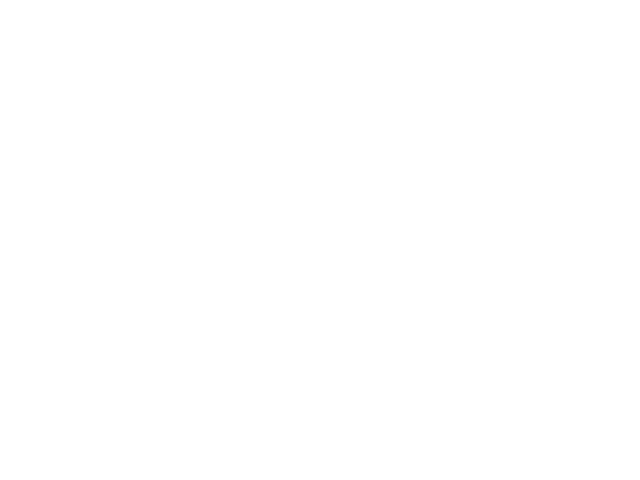

max=255. min=13
shape = (768L, 1024L, 3L)
distance = -48.4694 mm


<IPython.core.display.Javascript object>


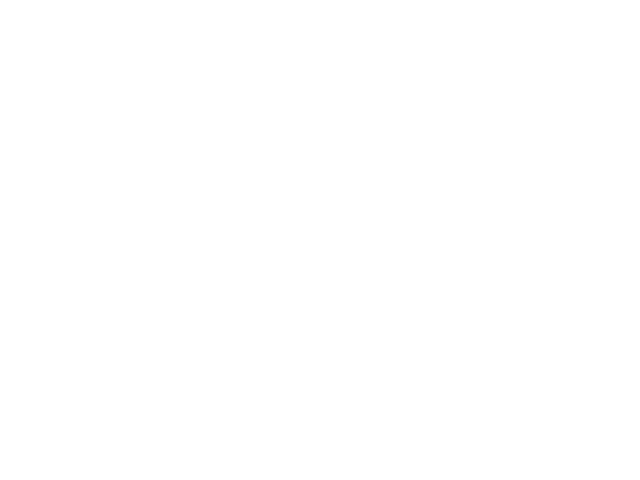

max=255. min=13
shape = (768L, 1024L, 3L)
distance = -43.3673 mm


<IPython.core.display.Javascript object>


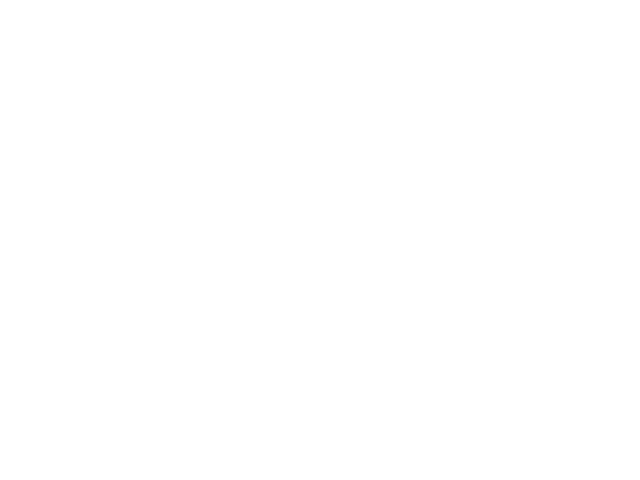

max=255. min=13
shape = (768L, 1024L, 3L)
distance = -38.2653 mm


<IPython.core.display.Javascript object>


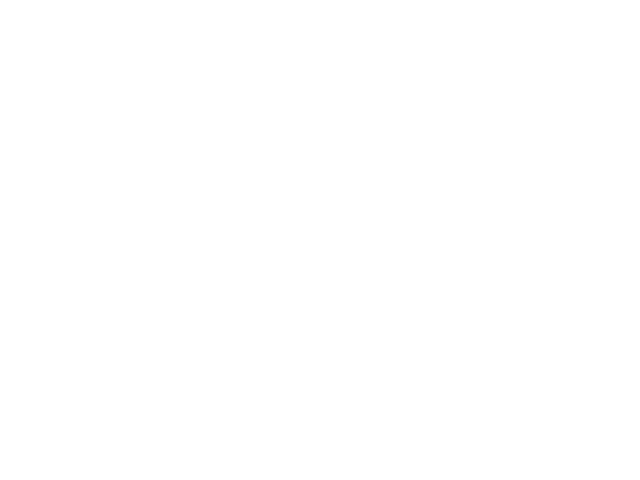

max=255. min=13
shape = (768L, 1024L, 3L)
distance = -33.1632 mm


<IPython.core.display.Javascript object>


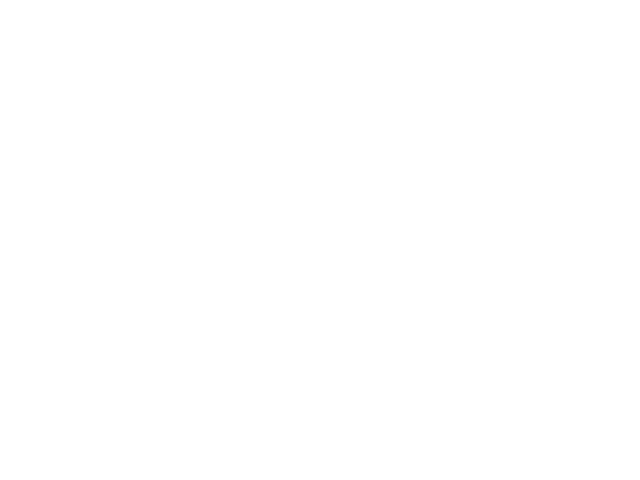

max=255. min=14
shape = (768L, 1024L, 3L)
distance = -28.0612 mm


<IPython.core.display.Javascript object>


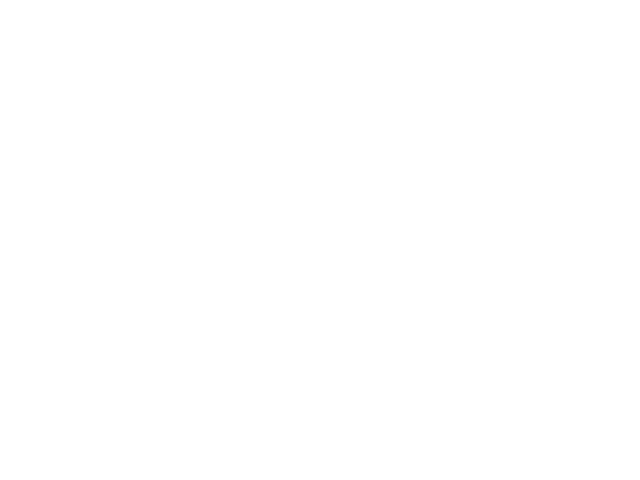

max=255. min=12
shape = (768L, 1024L, 3L)
distance = -22.9592 mm


<IPython.core.display.Javascript object>


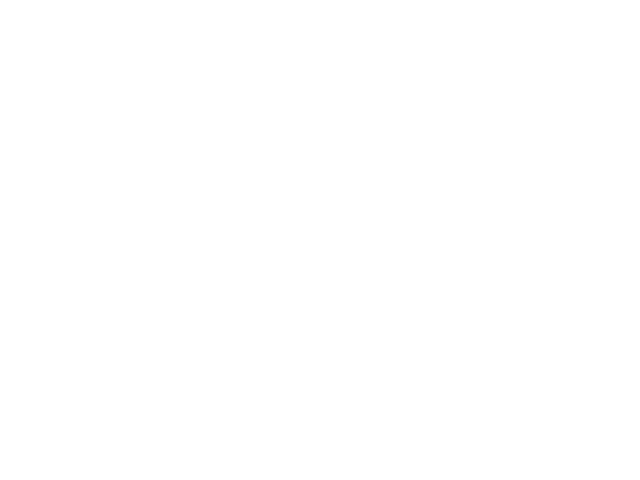

max=255. min=13
shape = (768L, 1024L, 3L)
distance = -17.8571 mm


<IPython.core.display.Javascript object>


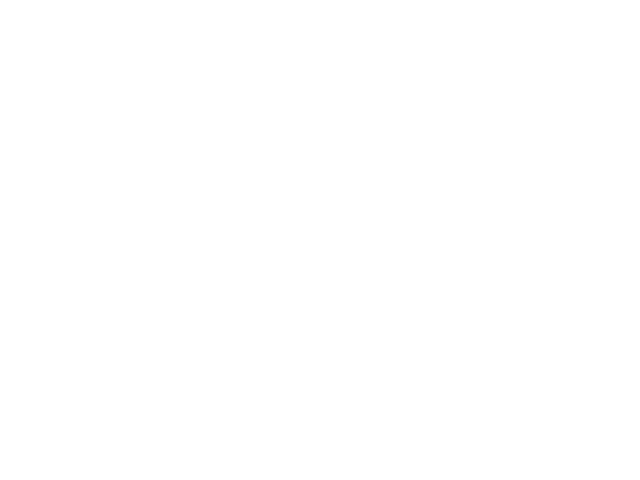

max=255. min=13
shape = (768L, 1024L, 3L)
distance = -12.7551 mm


<IPython.core.display.Javascript object>


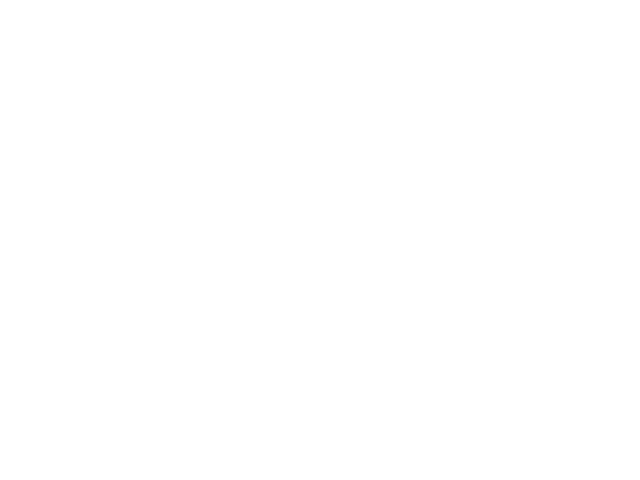

max=255. min=13
shape = (768L, 1024L, 3L)
distance = -7.6530 mm


<IPython.core.display.Javascript object>


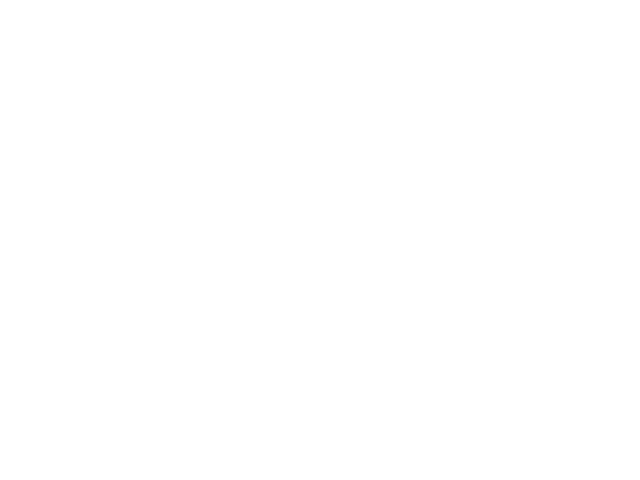

max=255. min=12
shape = (768L, 1024L, 3L)
distance = -2.5510 mm


<IPython.core.display.Javascript object>


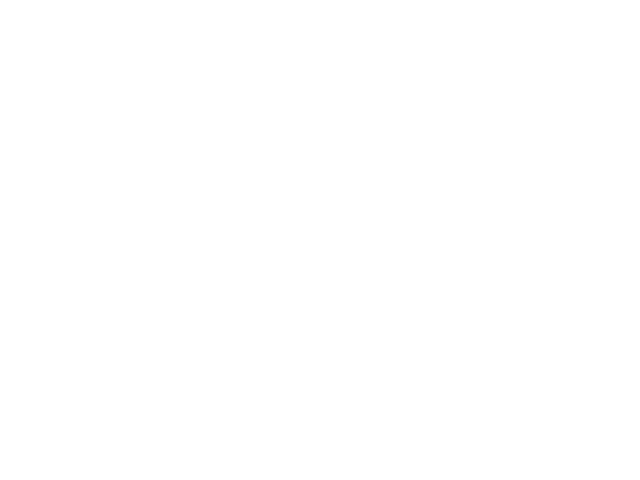

max=255. min=13
shape = (768L, 1024L, 3L)
distance = 2.5510 mm


<IPython.core.display.Javascript object>


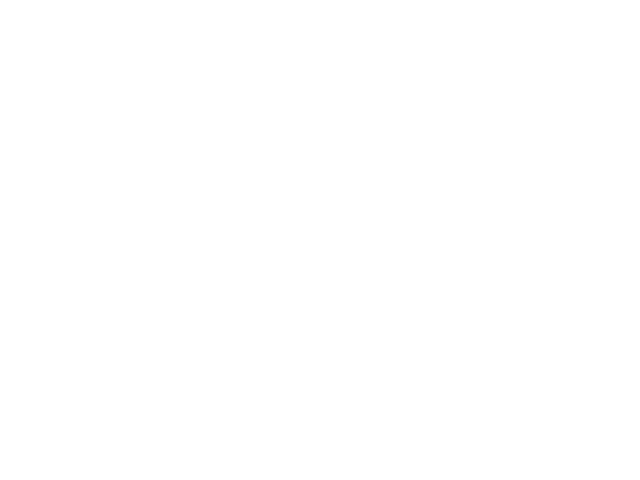

max=255. min=14
shape = (768L, 1024L, 3L)
distance = 7.6530 mm


<IPython.core.display.Javascript object>


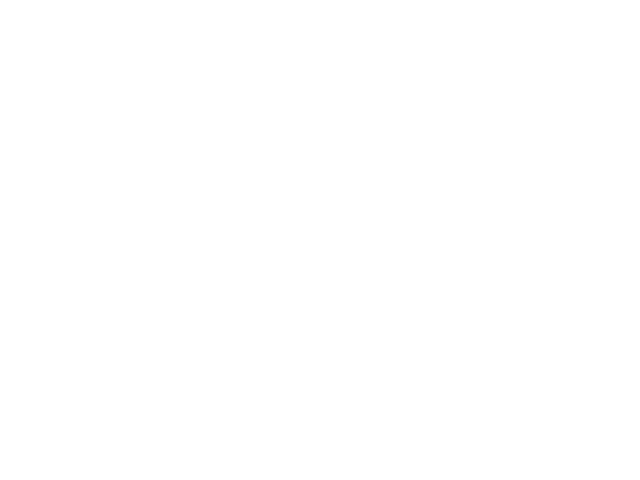

max=255. min=13
shape = (768L, 1024L, 3L)
distance = 12.7551 mm


<IPython.core.display.Javascript object>


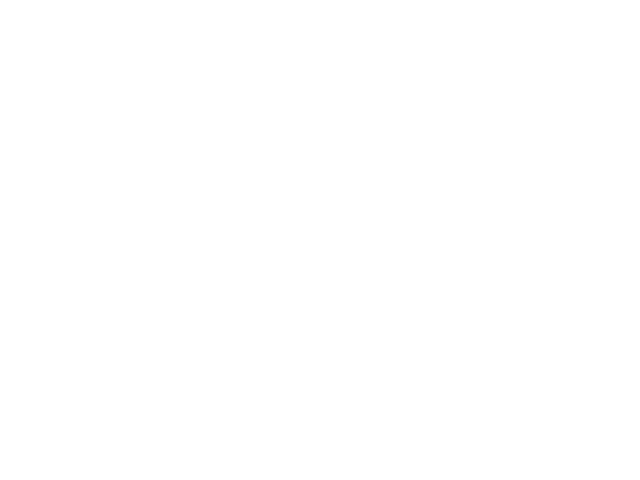

max=255. min=13
shape = (768L, 1024L, 3L)
distance = 17.8571 mm


<IPython.core.display.Javascript object>


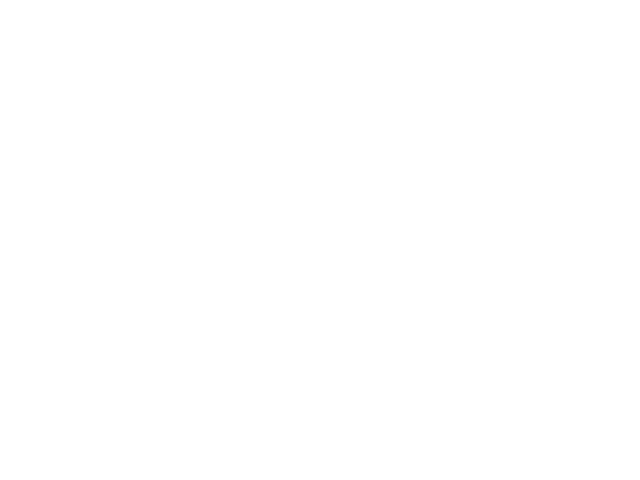

max=255. min=14
shape = (768L, 1024L, 3L)
distance = 22.9592 mm


<IPython.core.display.Javascript object>


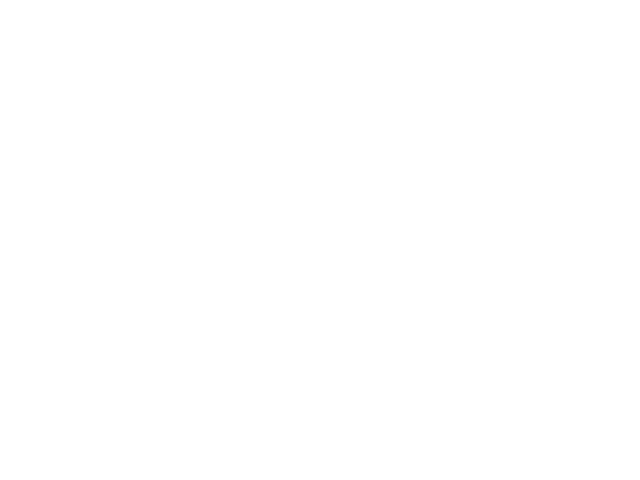

max=255. min=14
shape = (768L, 1024L, 3L)
distance = 28.0612 mm


<IPython.core.display.Javascript object>


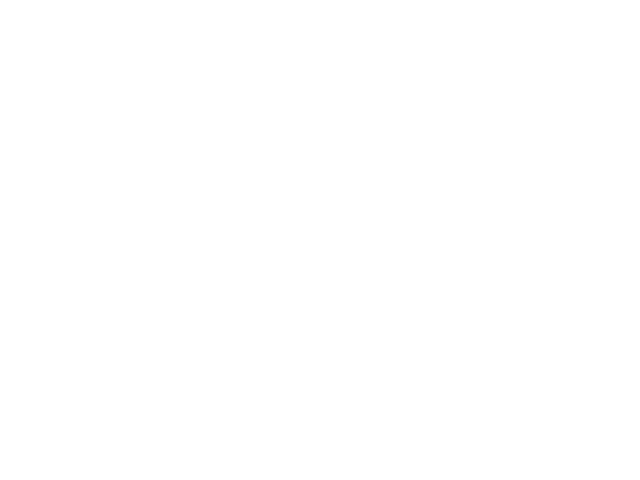

max=255. min=14
shape = (768L, 1024L, 3L)
distance = 33.1632 mm


<IPython.core.display.Javascript object>


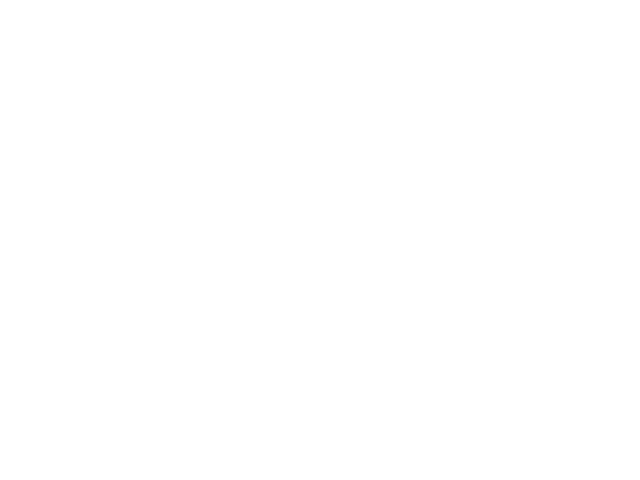

max=255. min=15
shape = (768L, 1024L, 3L)
distance = 38.2653 mm


<IPython.core.display.Javascript object>


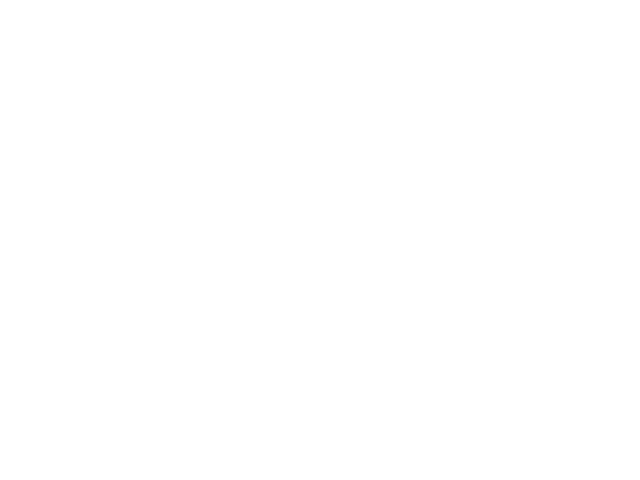

max=255. min=15
shape = (768L, 1024L, 3L)
distance = 43.3673 mm


<IPython.core.display.Javascript object>


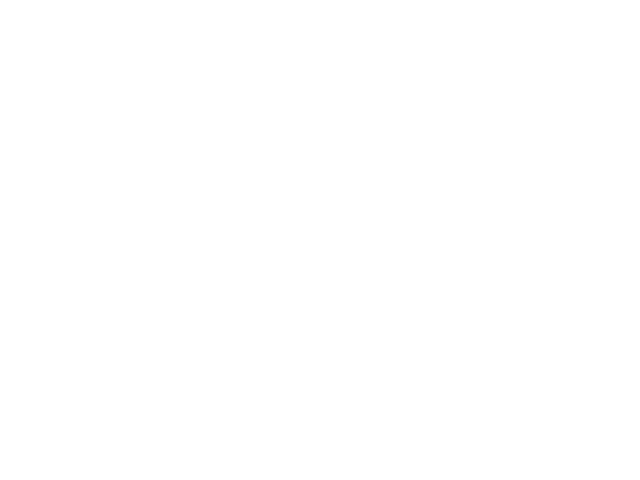

max=255. min=15
shape = (768L, 1024L, 3L)
distance = 48.4694 mm


<IPython.core.display.Javascript object>


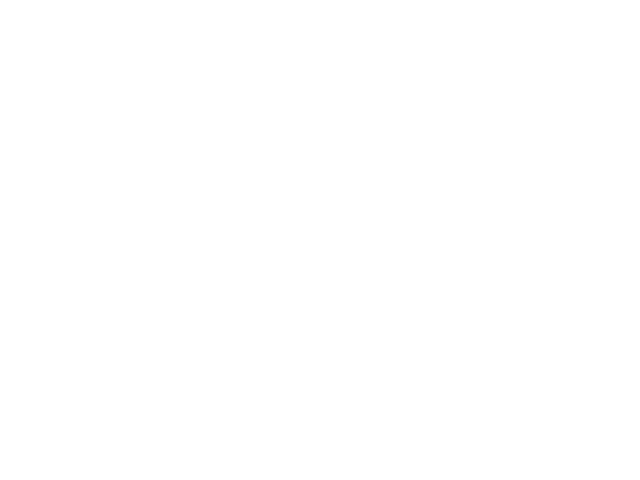

max=255. min=15
shape = (768L, 1024L, 3L)
distance = 53.5714 mm


<IPython.core.display.Javascript object>


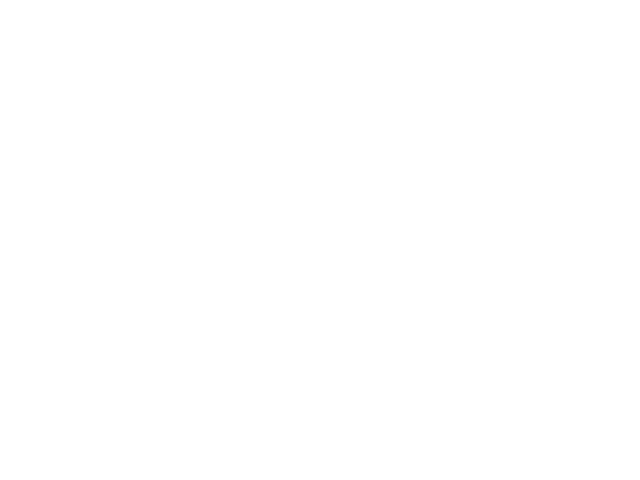

max=255. min=15
shape = (768L, 1024L, 3L)
distance = 58.6734 mm


<IPython.core.display.Javascript object>


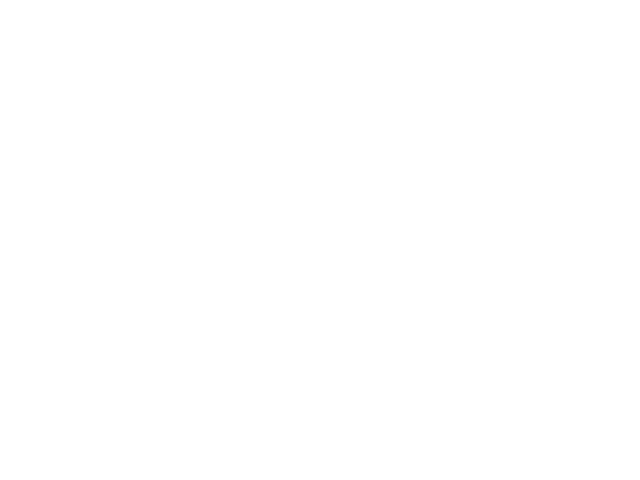

max=255. min=15
shape = (768L, 1024L, 3L)
distance = 63.7755 mm


<IPython.core.display.Javascript object>


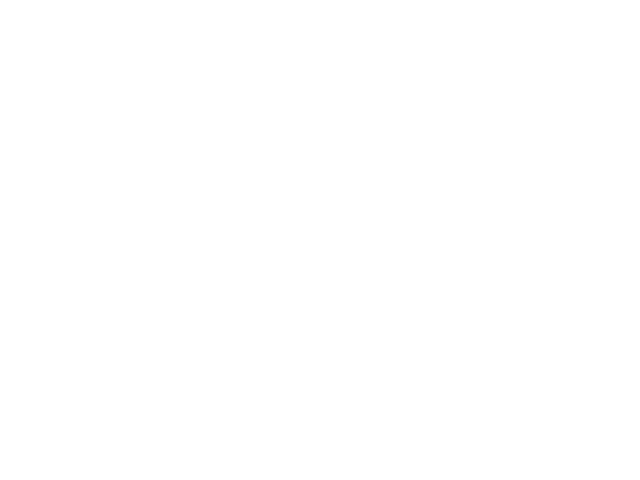

max=255. min=15
shape = (768L, 1024L, 3L)
distance = 68.8775 mm


<IPython.core.display.Javascript object>


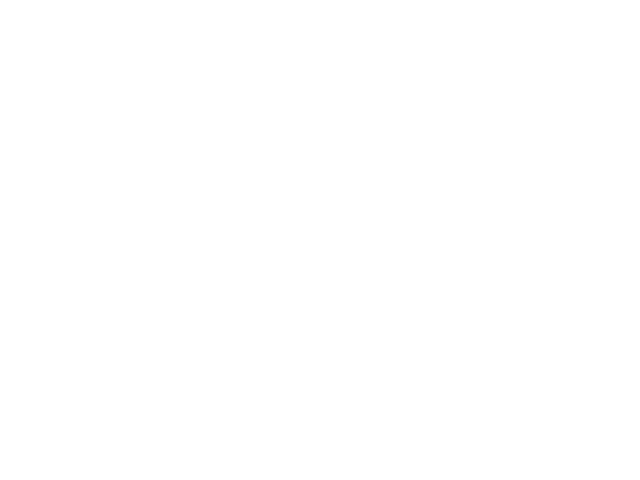

max=255. min=14
shape = (768L, 1024L, 3L)
distance = 73.9796 mm


<IPython.core.display.Javascript object>


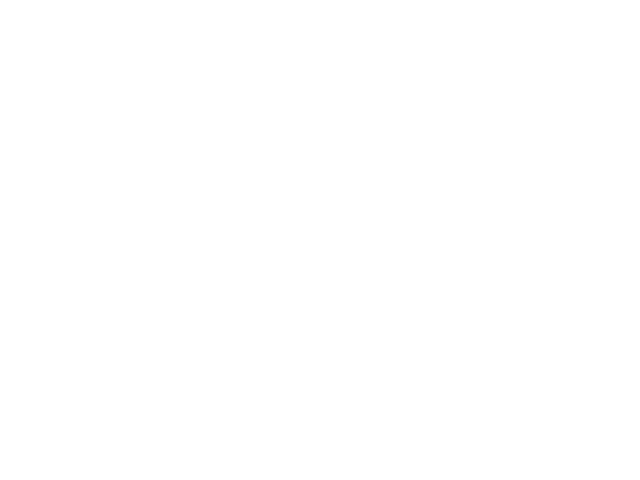

max=255. min=15
shape = (768L, 1024L, 3L)
distance = 79.0816 mm


<IPython.core.display.Javascript object>


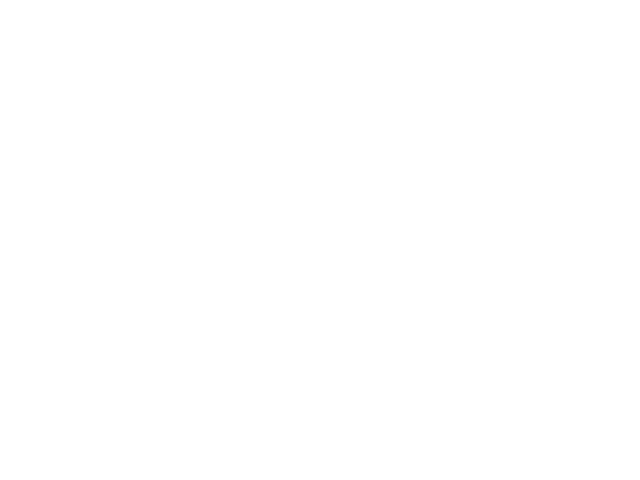

max=255. min=13
shape = (768L, 1024L, 3L)
distance = 84.1836 mm


<IPython.core.display.Javascript object>


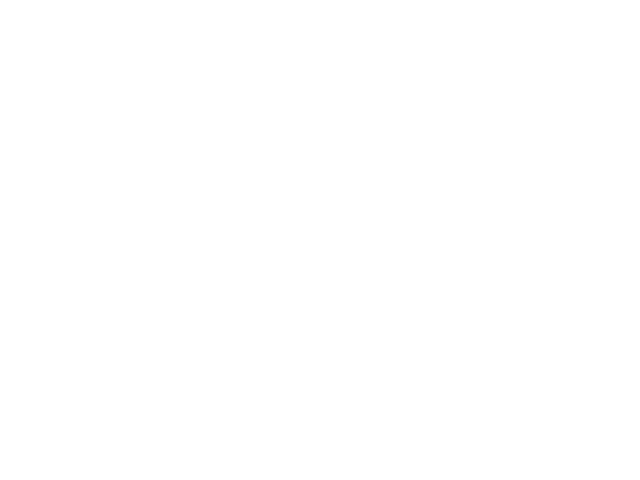

max=255. min=14
shape = (768L, 1024L, 3L)
distance = 89.2857 mm


<IPython.core.display.Javascript object>


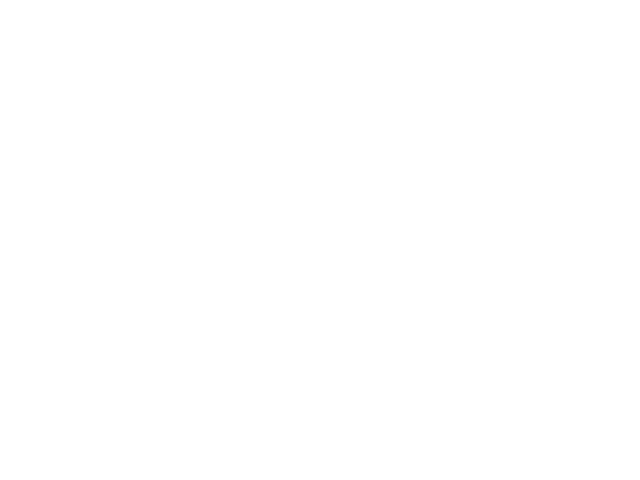

max=255. min=13
shape = (768L, 1024L, 3L)
distance = 94.3878 mm


<IPython.core.display.Javascript object>


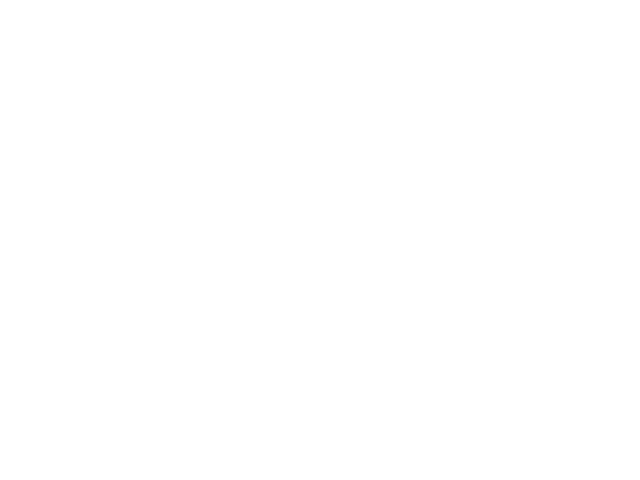

max=255. min=14
shape = (768L, 1024L, 3L)
distance = 99.4898 mm


<IPython.core.display.Javascript object>


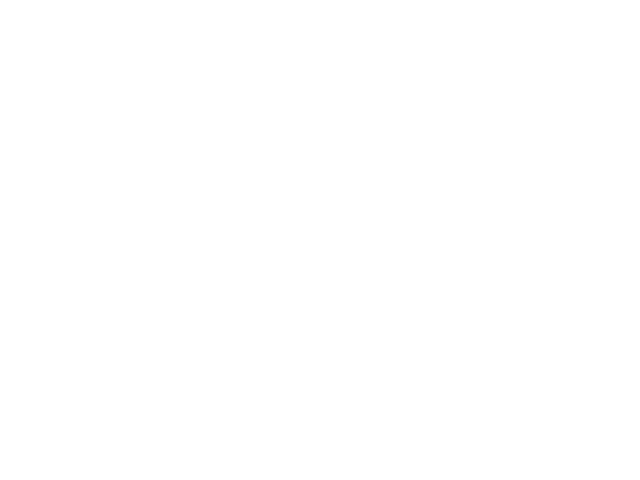

max=255. min=14
shape = (768L, 1024L, 3L)
distance = 104.5918 mm


<IPython.core.display.Javascript object>


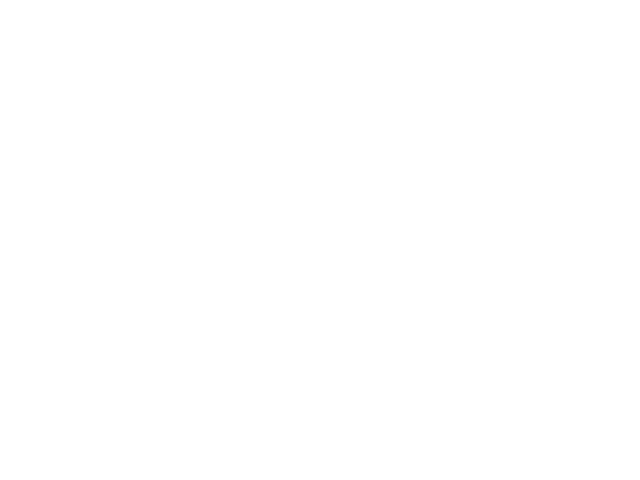

max=255. min=14
shape = (768L, 1024L, 3L)
distance = 109.6938 mm


<IPython.core.display.Javascript object>


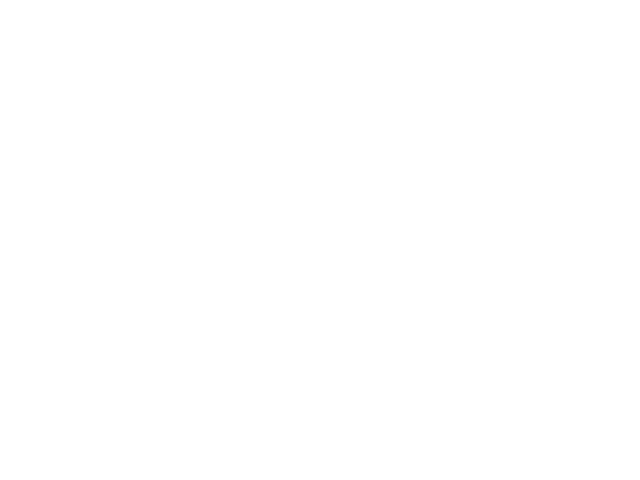

max=255. min=14
shape = (768L, 1024L, 3L)
distance = 114.7959 mm


<IPython.core.display.Javascript object>


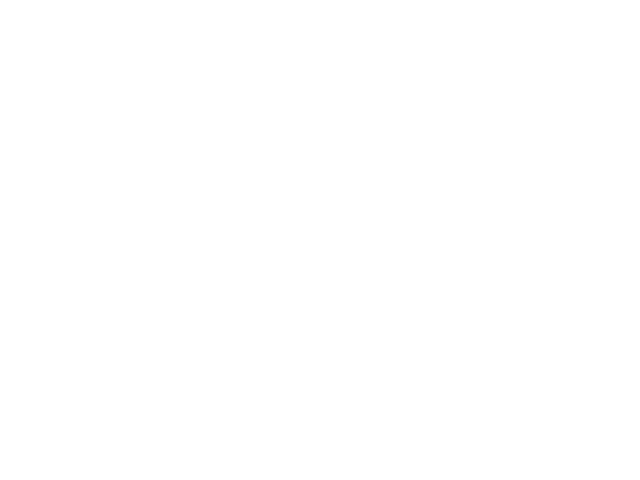

max=255. min=15
shape = (768L, 1024L, 3L)
distance = 119.8980 mm


<IPython.core.display.Javascript object>


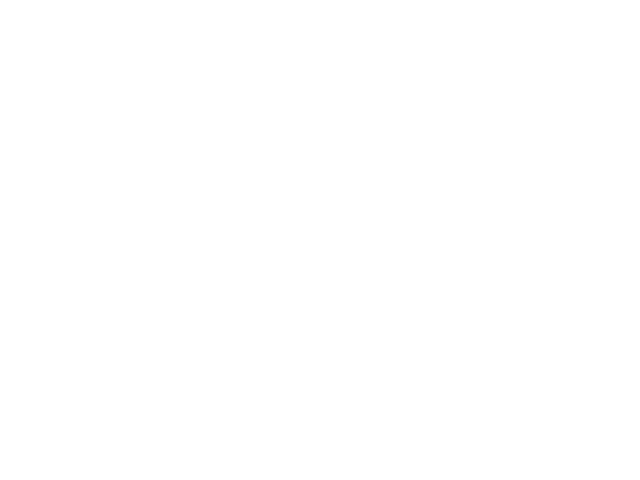

max=255. min=13
shape = (768L, 1024L, 3L)
distance = 125.0000 mm


<IPython.core.display.Javascript object>


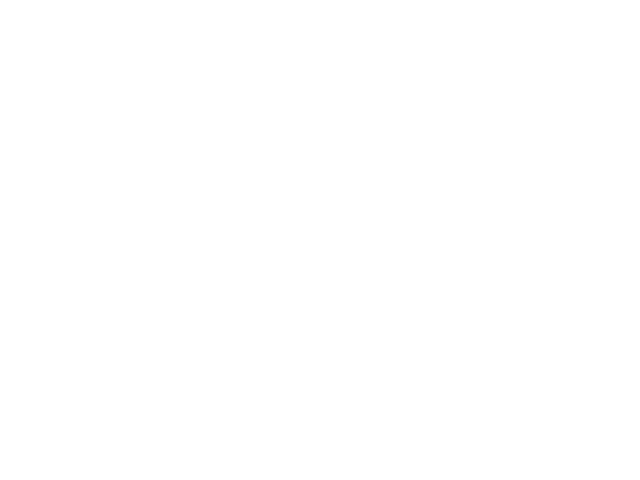

max=255. min=14
shape = (768L, 1024L, 3L)


In [16]:
directorio = 'C:/Users/luismiguel/bitbucket/py_slm/docs/source/TFG_rapariz/resultados_axicon4'
createFolder(directorio) # Creamos una carpeta donde guardaremos las imágenes del código
os.chdir(directorio) # Nos movemos al nuevo directorio

stops = np.linspace(-125 * mm, 125 * mm, 50)
SLM.vel_motor(vel = 20 * mm/s, kind = 'set')
SLM.move_motor(kind = 'home')

for i, stop in enumerate(stops):
    SLM.move_motor(stop)
    SLM.acquire_image(draw = False, 
                      filename = 'axicon_z_'+str(round(stop/mm)) +'.jpg', 
                      remove_background = False, 
                      is_closed = True)

os.chdir('C:/Users/luismiguel/bitbucket/py_slm/docs/source/TFG_rapariz')

## <center> Redes de Difracción <center>

In [ ]:
mascara.binary_grating(period=1 * mm, amin=0., amax=1., phase=0 * degrees,
                 x0=0, fill_factor=0.5, angle=0 * degrees)

In [ ]:
SLM.mask_to_rawImage(mask_XY = mascara, kind = 'amplitude', normalize = True)
SLM.send_image_screen(id_screen = 1)

SLM.vel_motor(vel = 20 * mm/s, kind = 'set')
SLM.move_motor(116 * mm)
SLM.get_background()

raw_input('Coloque el polarizador en fase y pulse enter.')
SLM.acquire_image(draw = False, 
                  filename = 'red_difraccion.jpg', 
                  remove_background = False, 
                  is_closed = True)

## <center> En el siguiente código se tomarán 50 imágenes de una red de difracción para distintos valores en $z \in [-125 , 125]mm$ y las guardará en la carpeta $resultados_{-}red_{-}difraccion$ <center>

In [ ]:
directorio = 'C:/Users/luismiguel/bitbucket/py_slm/docs/source/TFG_rapariz/resultados_red_difraccion'
createFolder(directorio) # Creamos una carpeta donde guardaremos las imágenes del código
os.chdir(directorio) # Nos movemos al nuevo directorio

stops = np.linspace(-125 * mm, 125 * mm, 50)
SLM.vel_motor(vel = 20 * mm/s, kind = 'set')
SLM.move_motor(kind = 'home')

for i, stop in enumerate(stops):
    SLM.move_motor(stop)
    SLM.acquire_image(draw = False, 
                      filename = 'fresnel_fase_z_'+str(round(stop/mm)) +'.jpg', 
                      remove_background = False, 
                      is_closed = True)

os.chdir('C:/Users/luismiguel/bitbucket/py_slm/docs/source/TFG_rapariz')

In [ ]:
mascara.forked_grating(r0=(0 * um, 0 * um), period=0.5 * mm, l=2,
                alpha=1, angle=0 * degrees)
mascara.draw(kind = 'amplitude')

In [ ]:
SLM.mask_to_rawImage(mask_XY = mascara, kind = 'amplitude', normalize = True)
SLM.send_image_screen(id_screen = 1)

In [ ]:
SLM.vel_motor(vel = 20 * mm/s, kind = 'set')
SLM.move_motor(116 * mm)
SLM.get_background()

raw_input('Coloque el polarizador en fase y pulse enter.')
SLM.acquire_image(draw = False, 
                  filename = 'forked_grating.jpg', 
                  remove_background = False, 
                  is_closed = True);

In [ ]:
directorio = 'C:/Users/luismiguel/bitbucket/py_slm/docs/source/TFG_rapariz/resultados_forked_grating'
createFolder(directorio) # Creamos una carpeta donde guardaremos las imágenes del código
os.chdir(directorio) # Nos movemos al nuevo directorio

stops = np.linspace(-125 * mm, 125 * mm, 50)
SLM.vel_motor(vel = 20 * mm/s, kind = 'set')
SLM.move_motor(kind = 'home')

for i, stop in enumerate(stops):
    SLM.move_motor(stop)
    SLM.acquire_image(draw = False, 
                      filename = 'forked_grating_z_'+str(round(stop/mm)) +'.jpg', 
                      remove_background = False, 
                      is_closed = True)

os.chdir('C:/Users/luismiguel/bitbucket/py_slm/docs/source/TFG_rapariz')

In [ ]:
SLM.square_scale_factor(r0 = (0 * um, 0 * um), lado = 1 * mm)

In [ ]:
mascara.axicon(r0=(0 * um, 0 * um), radius=10 * mm, height=10 * um,  n=1.5)

SLM.mask_to_rawImage(mask_XY = mascara, kind = 'phase', normalize = True)
SLM.send_image_screen(id_screen = 1)

In [34]:
SLM.move_motor(z = 85.0 * mm)

distance = 85.0000 mm


In [22]:
SLM.vel_motor(5 * mm/s)

velocidad = 5.00 mm/s


<IPython.core.display.Javascript object>


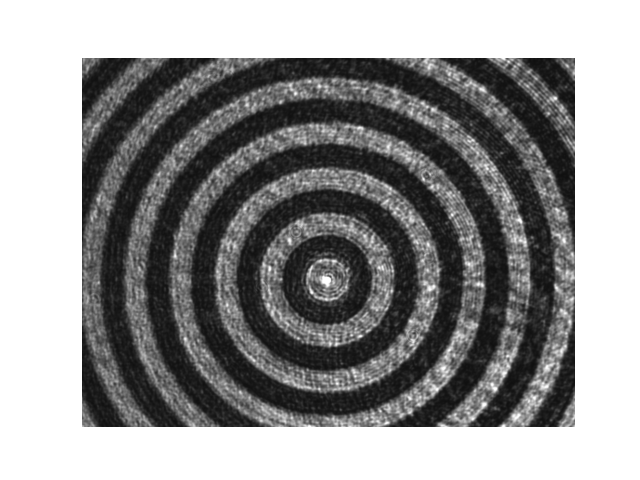

max=255. min=14
shape = (768L, 1024L, 3L)


array([[[181, 181, 181],
        [188, 188, 188],
        [194, 194, 194],
        ...,
        [178, 178, 178],
        [201, 201, 201],
        [217, 217, 217]],

       [[187, 187, 187],
        [200, 200, 200],
        [191, 191, 191],
        ...,
        [180, 180, 180],
        [197, 197, 197],
        [229, 229, 229]],

       [[188, 188, 188],
        [177, 177, 177],
        [175, 175, 175],
        ...,
        [163, 163, 163],
        [184, 184, 184],
        [212, 212, 212]],

       ...,

       [[108, 108, 108],
        [115, 115, 115],
        [138, 138, 138],
        ...,
        [102, 102, 102],
        [ 88,  88,  88],
        [ 70,  70,  70]],

       [[106, 106, 106],
        [114, 114, 114],
        [140, 140, 140],
        ...,
        [113, 113, 113],
        [111, 111, 111],
        [ 92,  92,  92]],

       [[109, 109, 109],
        [107, 107, 107],
        [112, 112, 112],
        ...,
        [125, 125, 125],
        [129, 129, 129],
        [117, 117, 117]]

In [35]:
SLM.acquire_image(draw = False, filename = 'axicon_final.jpg', remove_background = False, is_closed = False)

In [7]:
SLM.camera1.StartLive()

0

In [15]:
SLM.camera1.SetPropertySwitch("Gain", "Auto", 0)
SLM.camera1.SetPropertyValue("Gain", "Value", 10)

1

In [ ]:
SLM.motor.close()

In [36]:
del(SLM)

Todo se ha cerrado correctamente.


In [6]:
cv2.destroyAllWindows()